## Project Description 

The objective of this project is to develop a predictive model that can accurately forecast instances of customer default payments in Taiwan. By focusing on risk management, we aim to go beyond a simple binary classification of clients as credible or not credible. Instead, our emphasis is on estimating the probability of default for each customer. This approach provides a more valuable and nuanced understanding of the risk involved.

To assess the effectiveness of our predictive model, we will utilize a K-S chart. This chart allows us to evaluate and compare the performance of our model in identifying customers who are likely to default on their credit card payments. By analyzing the K-S chart, we can make informed decisions and take appropriate actions to mitigate potential default risks.

### Data Description

In this research, we examined the relationship between credit card default and various factors. The response variable, default payment, was represented by a binary variable where "Yes" indicated default (1) and "No" indicated no default (0). To analyze this, we considered a comprehensive set of 23 explanatory variables based on existing literature. 

Here is a detailed description of these variables:

1. X1: Amount of credit given in New Taiwan (NT) dollars, which includes both individual consumer credit and supplementary credit for the consumer's family.

2. X2: Gender, where 1 represents male and 2 represents female.

3. X3: Education level, categorized as follows: 1 = graduate school, 2 = university, 3 = high school, 4 = others.

4. X4: Marital status, classified as follows: 1 = married, 2 = single, 3 = others.

5. X5: Age of the individual in years.

6. X6 - X11: History of past payment. We examined the payment records from April to September 2005, where X6 represents the repayment status in September 2005, X7 represents the repayment status in August 2005, and so on. The scale used for measuring the repayment status is as follows: -1 = payment made duly, 1 = payment delayed by one month, 2 = payment delayed by two months, and so on, up to 9 = payment delayed by nine months or more. (# of months the amount has been due)

7. X12-X17: Amount of the bill statement in New Taiwan (NT) dollars. X12 represents the bill statement amount in September 2005, X13 represents the bill statement amount in August 2005, and so forth, up to X17 representing the bill statement amount in April 2005. (Amount Owed previously)

8. X18-X23: Amount of previous payment in New Taiwan (NT) dollars. X18 represents the amount paid in September 2005, X19 represents the amount paid in August 2005, and so on, up to X23 representing the amount paid in April 2005. (Amount Paid previously)

By analyzing these variables, we aim to gain insights into the factors that contribute to credit card default and develop a predictive model for identifying customers at risk of defaulting in the future.

### Project Objective

The objective of our project is to predict potential customers who are likely to default on their credit card payments in the upcoming months. Before delving into the details, let's first understand the definition of credit card default.

1. Understanding Credit Cards
- A credit card is a payment card that allows users to make purchases by utilizing a line of credit instead of using their own cash deposits. When a person uses a credit card for a transaction, they accumulate a balance that needs to be paid off on a monthly basis.

2. Defining Credit Card Default
- Credit card default occurs when an individual becomes significantly delinquent in making their credit card payments. It should be noted that missing a payment or two does not automatically result in default. Defaulting on a credit card payment happens when the Minimum Amount Due is not paid consecutively for several months.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
8643,8644,20000.0,1,2,2,38,0,0,0,0,...,18895.0,19325.0,19859.0,6500.0,2000.0,2000.0,1500.0,1000.0,1000.0,0
10921,10922,260000.0,2,1,2,50,0,0,0,0,...,256252.0,250390.0,251336.0,11046.0,10004.0,10000.0,10000.0,10000.0,20000.0,0
19917,19918,160000.0,2,2,1,45,-1,-1,-1,-1,...,3300.0,1650.0,1650.0,1650.0,5650.0,3300.0,1650.0,1650.0,1650.0,0
29108,29109,50000.0,2,3,2,57,2,2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11972,11973,160000.0,2,3,2,25,-1,-1,-1,-1,...,1520.0,5171.0,3716.0,201.0,13040.0,0.0,5171.0,3716.0,107.0,0


In [3]:
# Rename the default.payment.next.month column to IsDefaulter
df['IsDefaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)

# Descriptive statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,IsDefaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000


## Data Exploration & Preparing the Data

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

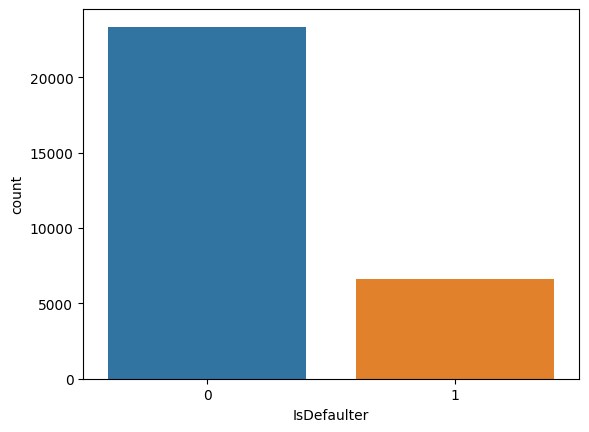

In [4]:
# Exploring the IsDefaulter column

sns.countplot(x = 'IsDefaulter', data = df)
df['IsDefaulter'].value_counts()

# We observe that both classes are not in proportion and we have imbalanced dataset.

### Categorical Variables

That are Sex, Marriage, Education. We want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

In [5]:
# Categgorical Variable - SEX

# 1 - Male
# 2 - Female

df['SEX'].value_counts()
# There are more females than males in the dataset

SEX
2    18112
1    11888
Name: count, dtype: int64

In [6]:
# Categgorical Variable - Marriage

# 1 - married
# 2 - single 
# 3 - others

df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [7]:
# We have few values for 0, which are not determined .so we adding them in Others category.
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

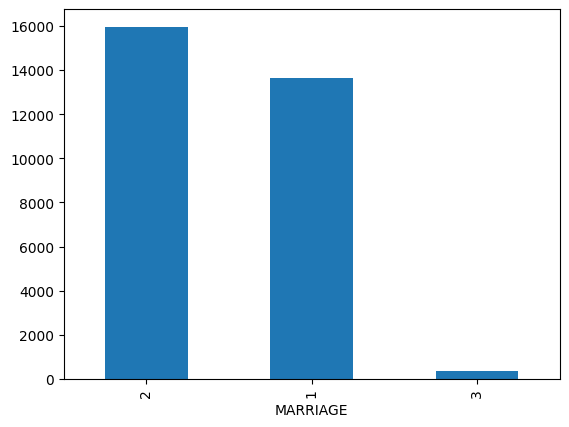

In [8]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

In [9]:
# Categgorical Variable - Education

# 1 = graduate school
# 2 = university
# 3 = high school
# 4 = others

df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [10]:
# As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

#### Observations - Categorical Varaibles

- There are more females credit card holder,so no. of defaulter have high proportion of females.
- No. of defaulters have a higher proportion of educated people (graduate school and university)
- No. of defaulters have a higher proportion of Singles.

### Numerical Variables

That are Limit Balance, Age, Bill Amount, History Payment Status, Paid Amount. 

In [11]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

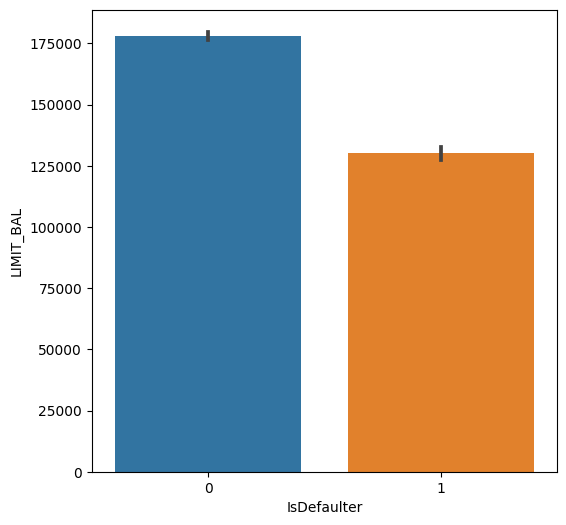

In [12]:
# Numerical Variable - Limit Balance
plt.figure(figsize=(6,6))
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

In [13]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

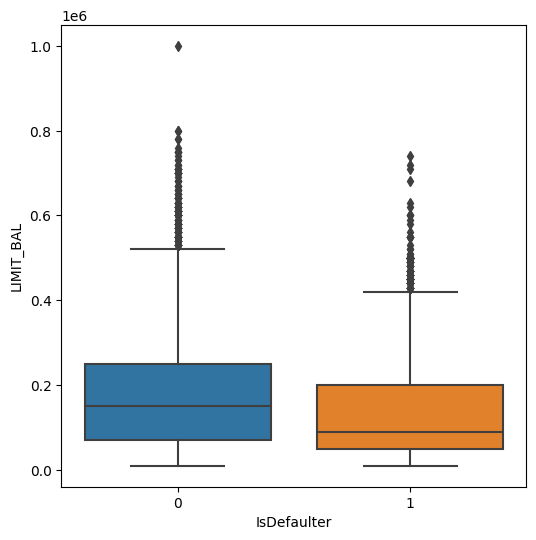

In [14]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

Clearly based of on our visual presentation; there is an imbalance between people who have defaulted and those who haven't. This can cause poor accuray in our prediction; hence we will balance the dataset in Feature Engineering section. 

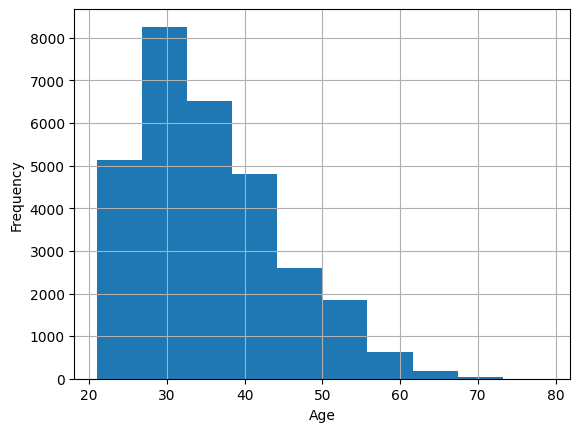

In [15]:
# Numerical Variable - Age
df.AGE.hist()
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Frequency")


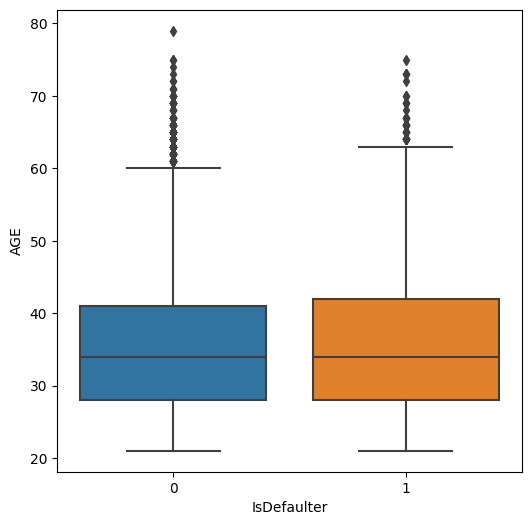

In [16]:
df.groupby('IsDefaulter')['AGE'].mean()
df = df.astype('int')
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

Based on this graph, we can infer that our age category is pretty balanced for both defaulters and non defaulters. 

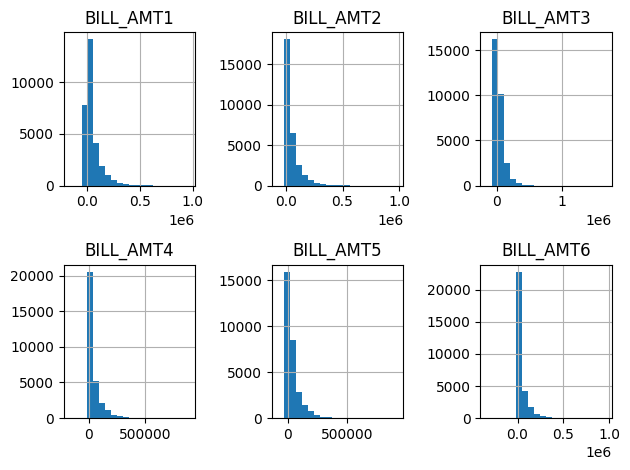

In [17]:
# Numerical Variable - Bill Amount (Amount Owed previously)

bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

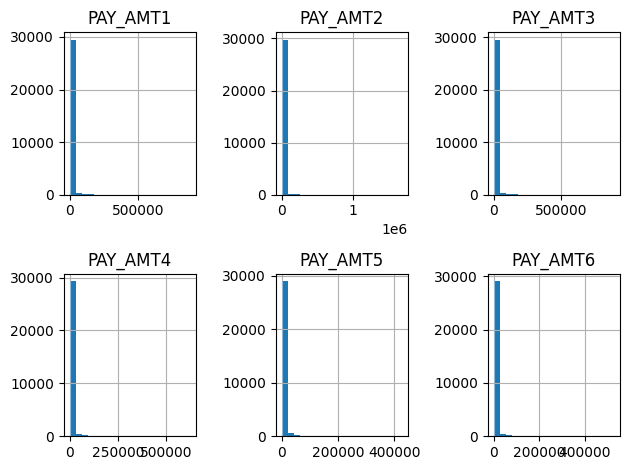

In [18]:
# Numerical Variable - Paid Amount (Amount Paid previously)

pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

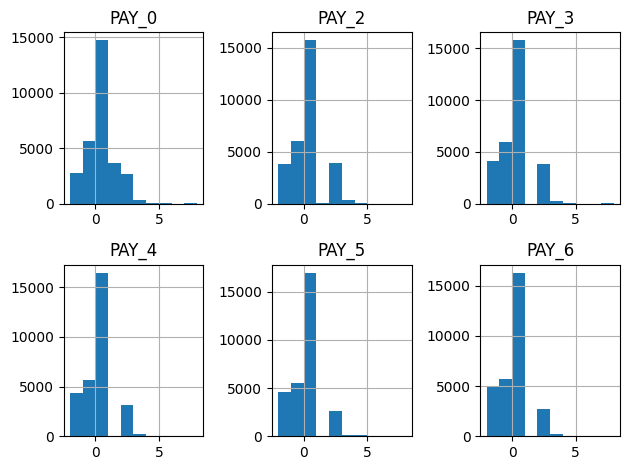

In [19]:
# Numerical Variable - Repayment Status (# of months the amount has been due)

late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# this is probably more of a category

In [20]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0.

## Feature Engineering

Considering the previously observed class imbalance in our dataset, we have implemented the Synthetic Minority Oversampling Technique (SMOTE) as a means to address this issue and achieve balance in our dataset.

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# Fit predictor and target variables

x_smote, y_smote = smote.fit_resample(df.iloc[:, 0:-1], df['IsDefaulter'])

original_dataset_shape = len(df)
resampled_dataset_shape = len(y_smote)

print('Original dataset shape:', original_dataset_shape)
print('Resampled dataset shape:', resampled_dataset_shape)

# Source [2]

Original dataset shape: 30000
Resampled dataset shape: 46728


In [22]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,11356,30000,2,2,1,41,2,2,2,0,...,26516,28566,27959,4972,0,1200,2642,0,2178,1
46724,15272,50000,1,2,1,40,0,0,0,0,...,6141,6191,6326,1080,1170,740,222,235,224,1
46725,18859,319988,1,1,2,28,1,1,1,0,...,22015,21162,25795,2001,1,2005,1001,4995,2000,1
46726,13126,20000,1,2,2,42,0,0,-1,1,...,667,691,703,756,681,0,137,12,0,1


In [23]:
columns = list(df.columns)
columns.pop()

'IsDefaulter'

<Axes: xlabel='IsDefaulter', ylabel='count'>

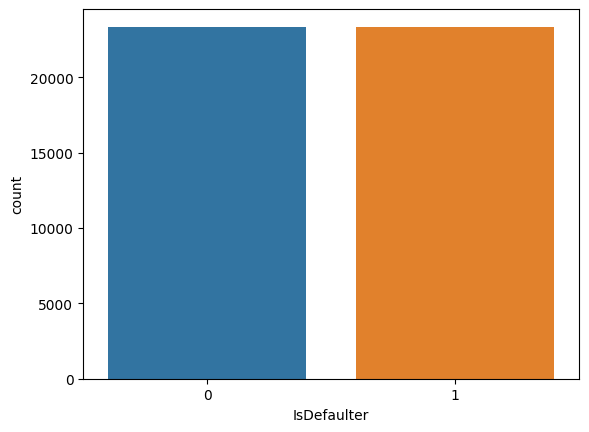

In [24]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote
sns.countplot(x = 'IsDefaulter', data = balance_df)

In [25]:
df_feature = balance_df.copy()
df_feature['Payment_Value'] = df_feature['PAY_0'] + df_feature['PAY_2'] + df_feature['PAY_3'] + df_feature['PAY_4'] + df_feature['PAY_5'] + df_feature['PAY_6']
df_feature.groupby('IsDefaulter')['Payment_Value'].mean()

IsDefaulter
0   -1.980140
1    1.643469
Name: Payment_Value, dtype: float64

In [26]:
df_feature['EDUCATION'].unique()

array([2, 1, 3, 4])

In [27]:
df_feature['EDUCATION'] = np.where(df_feature['EDUCATION'] == 6, 4, df_feature['EDUCATION'])
df_feature['EDUCATION'] = np.where(df_feature['EDUCATION'] == 0, 4, df_feature['EDUCATION'])

In [28]:
df_feature['MARRIAGE'].unique()

array([1, 2, 3])

In [29]:
df_feature['MARRIAGE']=np.where(df_feature['MARRIAGE'] == 0, 3, df_feature['MARRIAGE'])

In [30]:
df_feature.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

# Source [2]

In [31]:
df_feature.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,IsDefaulter,Payment_Value
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,-2
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,3
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,0
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0,-2


### One Hot Encoding

In [35]:
df_feature = pd.get_dummies(df_feature,columns=['EDUCATION','MARRIAGE'])
df_feature.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default.payment.next.month,IsDefaulter,Payment_Value,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,1,-2,False,False,False,True,True,False,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,1,3,False,False,False,True,False,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,0,False,False,False,True,False,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,0,False,False,False,True,True,False,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,0,-2,False,False,False,True,True,False,False


In [36]:
df_feature.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)
df_feature = pd.get_dummies(df_feature, columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], drop_first=True)

In [37]:
df_feature.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [33]:
# LABEL ENCODING FOR SEX
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_feature.replace(encoders_nums)

In [34]:
df_feature.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,IsDefaulter,Payment_Value
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,-2
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,3
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,0
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0,-2


In [ ]:
df_feature.drop('ID',axis = 1, inplace = True)

In [40]:
df_feature.head()   


,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,FEMALE,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,MALE,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


## Selecting a training model

## Fine tuning our model

## Solution

Next? Launch, monitor, and maintain your system.

### Sources
1. https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook 
2. https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction 